In [1]:
import pandas as pd
import hvplot.pandas
import holoviews as hv
import numpy as np
from holoviews import opts
import panel as pn
pn.extension()
hv.extension('bokeh')
import geopandas as gpd
from shapely.geometry import Point
import folium
import branca.colormap as cm
import os
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Define the folder path and file name
data_csv_file="data/commute/CSVLog_20240924_143403.CSV"

output_folder_path = 'output/date/analysis_20240924_am/'  # Change this to your folder path

df_file_name = "df.csv"
df_file_path = os.path.join(output_folder_path, df_file_name)
map_moving_file_path = os.path.join(output_folder_path, 'map_moving.html')
#create folder folder if it does not exist
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

In [3]:
df=pd.read_csv(data_csv_file)
df.columns = df.columns.str.strip()
df_file_path = os.path.join(output_folder_path, df_file_name)
df.to_csv(df_file_path, index=False)
#df.head()

In [4]:
column_list=df.columns.tolist()
print(column_list)

['Time (sec)', 'Instant fuel economy (MPG)', 'Intake manifold absolute pressure (inHg)', 'Engine RPM (RPM)', 'Vehicle speed (MPH)', 'Mass air flow rate (lb/min)', 'Barometric pressure (inHg)', 'Ambient air temperature (°F)', 'Relative accelerator pedal position (%)', 'Intake air temperature bank 1  sensor 1 (°F)', 'Intake air temperature bank 1  sensor 2 (°F)', 'Commanded fuel rail pressure A (inHg)', 'Fuel rail pressure A (inHg)', 'Boost (psi)', 'Acceleration (ft/s²)', 'Acceleration (Avg) (ft/s²)', 'Engine Power (hp)', 'Engine Torque (lb•ft)', 'Trip Distance (miles)', 'Trip Fuel Economy (MPG)', 'Latitude (deg)', 'Longitude (deg)', 'Altitude (ft)']


In [5]:
df=df[['Time (sec)', 
       'Vehicle speed (MPH)',
       'Acceleration (ft/s²)',
       'Acceleration (Avg) (ft/s²)', 
       'Relative accelerator pedal position (%)',
       'Engine RPM (RPM)',
       'Boost (psi)',
       'Engine Power (hp)',
       'Mass air flow rate (lb/min)',
       'Intake manifold absolute pressure (inHg)',
       'Commanded fuel rail pressure A (inHg)',
       'Fuel rail pressure A (inHg)',
       'Ambient air temperature (°F)',
       'Intake air temperature bank 1  sensor 1 (°F)',
       'Intake air temperature bank 1  sensor 2 (°F)',
       'Trip Distance (miles)',
       'Instant fuel economy (MPG)',
       'Trip Fuel Economy (MPG)',
       'Barometric pressure (inHg)',
       'Altitude (ft)',
       'Latitude (deg)',
       'Longitude (deg)']]
df.head()

,Time (sec),Vehicle speed (MPH),Acceleration (ft/s²),Acceleration (Avg) (ft/s²),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),...,Ambient air temperature (°F),Intake air temperature bank 1 sensor 1 (°F),Intake air temperature bank 1 sensor 2 (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Barometric pressure (inHg),Altitude (ft),Latitude (deg),Longitude (deg)
0,0.000,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.101,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.201,0.0,2.185478e-15,9.015099e-15,0.0,0.0,0.0,9.582979,1.051785,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.302,0.0,2.185478e-15,9.015099e-15,0.0,0.0,0.0,9.582979,1.051785,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.402,0.0,2.185478e-15,9.015099e-15,0.0,0.0,0.0,9.582979,1.051785,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.dtypes

Time (sec)                                      float64
Vehicle speed (MPH)                             float64
Acceleration (ft/s²)                            float64
Acceleration (Avg) (ft/s²)                      float64
Relative accelerator pedal position (%)         float64
Engine RPM (RPM)                                float64
Boost (psi)                                     float64
Engine Power (hp)                               float64
Mass air flow rate (lb/min)                     float64
Intake manifold absolute pressure (inHg)        float64
Commanded fuel rail pressure A (inHg)           float64
Fuel rail pressure A (inHg)                     float64
Ambient air temperature (°F)                    float64
Intake air temperature bank 1  sensor 1 (°F)    float64
Intake air temperature bank 1  sensor 2 (°F)    float64
Trip Distance (miles)                           float64
Instant fuel economy (MPG)                      float64
Trip Fuel Economy (MPG)                         

In [7]:
# To avoid math errors in situations where values = 0
df['Boost (psi)'] = df['Boost (psi)'].bfill().infer_objects()
df.loc[df['Boost (psi)'] == 0, 'Boost (psi)'] = 0.01

df.head()


,Time (sec),Vehicle speed (MPH),Acceleration (ft/s²),Acceleration (Avg) (ft/s²),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),...,Ambient air temperature (°F),Intake air temperature bank 1 sensor 1 (°F),Intake air temperature bank 1 sensor 2 (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Barometric pressure (inHg),Altitude (ft),Latitude (deg),Longitude (deg)
0,0.000,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.01,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.101,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.01,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.201,0.0,2.185478e-15,9.015099e-15,0.0,0.0,0.01,9.582979,1.051785,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.302,0.0,2.185478e-15,9.015099e-15,0.0,0.0,0.01,9.582979,1.051785,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.402,0.0,2.185478e-15,9.015099e-15,0.0,0.0,0.01,9.582979,1.051785,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
def clean_data(df):
    # Round columns 'Time (sec)', ' Engine RPM (RPM)' and 2 other columns (Number of decimals: 0)
    df = df.round({'Engine RPM (RPM)': 0, 'Engine Power (hp)': 0, 'Fuel rail pressure A (inHg)':0,'Commanded fuel rail pressure A (inHg)':0,'Altitude (ft)':0})
    # Round columns ' Instant fuel economy (MPG)', ' Vehicle speed (MPH)' and 4 other columns (Number of decimals: 1)
    df = df.round({'Instant fuel economy (MPG)': 1, 'Vehicle speed (MPH)': 1,'Relative accelerator pedal position (%)': 1, 'Trip Fuel Economy (MPG)': 1,'Boost (psi)':1})
    # Round columns ' Intake manifold absolute pressure (inHg)', ' Mass air flow rate (lb/min)', ' Bearing (deg)' (Number of decimals: 2)
    df = df.round({'Intake manifold absolute pressure (inHg)': 2, 'Mass air flow rate (lb/min)': 2,'Bearing (deg)': 2,'Acceleration (ft/s²)': 2,'Acceleration (Avg) (ft/s²)': 2,'Trip Distance (miles)': 2 })
    # Drop columns: ' Intake manifold absolute pressure (inHg)', ' Mass air flow rate (lb/min)' and 3 other columns
    df = df.round({'Time (sec)': 3})
    # Rename column 'Latitude (deg)' to 'latitude'
    df = df.rename(columns={'Latitude (deg)': 'latitude'})
    # Rename column 'Longitude (deg)' to 'longitude'
    df = df.rename(columns={'Longitude (deg)': 'longitude'})
    return df

df_clean = clean_data(df.copy())
df_clean.head()

,Time (sec),Vehicle speed (MPH),Acceleration (ft/s²),Acceleration (Avg) (ft/s²),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),...,Ambient air temperature (°F),Intake air temperature bank 1 sensor 1 (°F),Intake air temperature bank 1 sensor 2 (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Barometric pressure (inHg),Altitude (ft),latitude,longitude
0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.201,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1.05,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.302,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1.05,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.402,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1.05,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#create dataframe where vehicle is stationary
df_stationary = df_clean[df_clean['Vehicle speed (MPH)'] == 0]
df_stationary.head()

,Time (sec),Vehicle speed (MPH),Acceleration (ft/s²),Acceleration (Avg) (ft/s²),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),...,Ambient air temperature (°F),Intake air temperature bank 1 sensor 1 (°F),Intake air temperature bank 1 sensor 2 (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Barometric pressure (inHg),Altitude (ft),latitude,longitude
0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.201,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1.05,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.302,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1.05,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.402,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1.05,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#creates dataframe where the vehicle is moving or is about to begin motion after being stationary
df_clean['next_mph'] = df_clean['Vehicle speed (MPH)'].shift(-1)
mask = (df_clean['Vehicle speed (MPH)'] > 0) | ((df_clean['Vehicle speed (MPH)'] == 0) & (df_clean['next_mph'] > 0))
df_moving= df_clean[mask].drop(columns=['next_mph'])
df_moving.head()

,Time (sec),Vehicle speed (MPH),Acceleration (ft/s²),Acceleration (Avg) (ft/s²),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),...,Ambient air temperature (°F),Intake air temperature bank 1 sensor 1 (°F),Intake air temperature bank 1 sensor 2 (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Barometric pressure (inHg),Altitude (ft),latitude,longitude
99,9.902,0.0,0.00,0.00,0.0,1268.0,-9.0,12.0,1.29,10.93,...,82.4,89.6,93.2,0.0,0.0,0.0,29.234798,820.0,44.860573,-93.341820
100,10.001,0.6,3.04,0.61,0.0,1136.0,-8.4,11.0,1.23,12.11,...,82.4,89.6,93.2,0.0,0.8,0.0,29.234798,819.0,44.860580,-93.341835
101,10.102,0.6,3.04,0.61,0.0,1136.0,-8.4,11.0,1.23,12.11,...,82.4,89.6,93.2,0.0,0.8,0.0,29.234798,819.0,44.860580,-93.341835
102,10.202,1.2,5.91,1.18,0.0,1048.0,-7.7,10.0,1.14,13.58,...,82.4,89.6,93.2,0.0,1.6,0.0,29.234798,819.0,44.860580,-93.341835
103,10.302,1.2,5.91,1.18,0.0,1048.0,-7.7,10.0,1.14,13.58,...,82.4,89.6,93.2,0.0,1.6,0.0,29.234798,819.0,44.860580,-93.341835


In [11]:
hvexplorer = df_moving.hvplot.explorer()
hvexplorer

BokehModel(combine_events=True, render_bundle={'docs_json': {'e6590ad0-3774-451b-8671-74809ad33f76': {'version…

In [12]:
#experimenting 
df_moving['Mass Air/Boost']=df_moving['Mass air flow rate (lb/min)']/df_moving['Boost (psi)']
df_moving['Mass Air/manPress']=df_moving['Mass air flow rate (lb/min)']/df_moving['Intake manifold absolute pressure (inHg)']
df_moving.head()

,Time (sec),Vehicle speed (MPH),Acceleration (ft/s²),Acceleration (Avg) (ft/s²),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),...,Intake air temperature bank 1 sensor 2 (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Barometric pressure (inHg),Altitude (ft),latitude,longitude,Mass Air/Boost,Mass Air/manPress
99,9.902,0.0,0.00,0.00,0.0,1268.0,-9.0,12.0,1.29,10.93,...,93.2,0.0,0.0,0.0,29.234798,820.0,44.860573,-93.341820,-0.143333,0.118024
100,10.001,0.6,3.04,0.61,0.0,1136.0,-8.4,11.0,1.23,12.11,...,93.2,0.0,0.8,0.0,29.234798,819.0,44.860580,-93.341835,-0.146429,0.101569
101,10.102,0.6,3.04,0.61,0.0,1136.0,-8.4,11.0,1.23,12.11,...,93.2,0.0,0.8,0.0,29.234798,819.0,44.860580,-93.341835,-0.146429,0.101569
102,10.202,1.2,5.91,1.18,0.0,1048.0,-7.7,10.0,1.14,13.58,...,93.2,0.0,1.6,0.0,29.234798,819.0,44.860580,-93.341835,-0.148052,0.083947
103,10.302,1.2,5.91,1.18,0.0,1048.0,-7.7,10.0,1.14,13.58,...,93.2,0.0,1.6,0.0,29.234798,819.0,44.860580,-93.341835,-0.148052,0.083947


In [13]:
#creates dataframe where vehicle is moving and speed is less than 10mph
mask = (df_moving['Vehicle speed (MPH)'] <= 10)
df_less_10 = df_moving[mask]
#df_less_10.head()
df_less_10.describe()

,Time (sec),Vehicle speed (MPH),Acceleration (ft/s²),Acceleration (Avg) (ft/s²),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),...,Intake air temperature bank 1 sensor 2 (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Barometric pressure (inHg),Altitude (ft),latitude,longitude,Mass Air/Boost,Mass Air/manPress
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1053.733888,6.328000,-0.358880,-1.368900,5.584000,1261.422000,-7.412200,14.386000,1.533000,14.145420,...,97.883600,16.331880,12.223200,16.773000,2.923480e+01,914.298000,44.955511,-93.155208,-0.719672,0.089974
std,1003.195958,2.693504,4.466269,3.250654,9.342697,485.196363,3.841289,14.445288,1.527717,7.819223,...,5.442397,16.041612,10.124558,10.252072,3.556272e-15,95.297263,0.093593,0.186547,5.997922,0.041523
min,9.902000,0.000000,-12.440000,-10.120000,0.000000,561.000000,-11.600000,3.000000,0.350000,5.610000,...,91.400000,0.000000,0.000000,0.000000,2.923480e+01,812.000000,44.860218,-93.345660,-55.500000,0.036750
25%,34.277000,4.300000,-3.060000,-3.330000,0.000000,915.250000,-10.400000,4.000000,0.437500,7.970000,...,93.200000,0.070000,3.600000,7.300000,2.923480e+01,825.000000,44.860512,-93.343135,-0.324380,0.058462
50%,1884.612000,6.200000,0.000000,-1.865000,0.000000,1091.500000,-9.000000,8.000000,0.820000,10.930000,...,98.600000,30.790000,9.500000,26.400000,2.923480e+01,954.000000,45.035053,-92.984710,-0.087778,0.078385
75%,1967.388250,8.700000,2.580000,0.612500,8.600000,1615.000000,-5.100000,22.000000,2.305000,18.900000,...,102.200000,31.310000,18.725000,26.500000,2.923480e+01,1033.000000,45.042652,-92.984470,-0.037409,0.118544
max,2194.767000,9.900000,13.080000,8.760000,49.000000,2555.000000,2.000000,66.000000,7.010000,33.370000,...,107.600000,33.480000,41.600000,26.600000,2.923480e+01,1040.000000,45.058100,-92.954770,50.600000,0.214557


In [14]:
#creates dataframe where vehicle is moving and speed is between 10 and 20mph
mask = (df_moving['Vehicle speed (MPH)'] >= 10) & (df_moving['Vehicle speed (MPH)'] <= 20)
df_10_20 = df_moving[mask]
#df_10_20.head()
df_10_20.describe()

C:\Users\767144\AppData\Roaming\Python\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Time (sec),Vehicle speed (MPH),Acceleration (ft/s²),Acceleration (Avg) (ft/s²),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),...,Intake air temperature bank 1 sensor 2 (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Barometric pressure (inHg),Altitude (ft),latitude,longitude,Mass Air/Boost,Mass Air/manPress
count,600.000000,600.000000,600.000000,600.00000,600.0000,600.000000,600.000000,600.000000,600.000000,600.000000,...,600.000000,600.000000,600.000000,600.000000,6.000000e+02,600.000000,600.000000,600.000000,600.000000,600.000000
mean,1013.932610,14.932167,0.011217,0.04095,4.5730,1697.950000,-7.113833,20.976667,2.254667,14.751317,...,95.552000,15.481817,27.567667,17.265500,2.923480e+01,906.611667,44.950148,-93.167324,inf,0.119975
std,996.853223,3.195403,5.071108,4.63268,6.3405,607.374267,4.996198,23.823211,2.484770,10.173704,...,5.150097,16.024086,23.109084,9.080116,3.555678e-15,88.027869,0.094672,0.187831,NaN,0.055277
min,15.201000,10.600000,-12.400000,-7.29000,0.0000,761.000000,-12.000000,3.000000,0.350000,4.720000,...,87.800000,0.010000,1.600000,2.300000,2.923480e+01,813.000000,44.858610,-93.351350,-54.600000,0.048780
25%,53.578000,11.800000,-3.120000,-4.30000,0.0000,1221.750000,-11.300000,4.000000,0.470000,6.200000,...,91.400000,0.167500,6.375000,9.700000,2.923480e+01,825.750000,44.860350,-93.345390,-0.267502,0.077419
50%,219.455500,14.900000,0.000000,-0.62000,0.0000,1534.000000,-9.600000,8.000000,0.920000,9.740000,...,93.200000,1.420000,19.500000,15.000000,2.923480e+01,846.000000,44.863152,-93.342103,-0.063972,0.096095
75%,2140.592250,18.000000,3.120000,3.49000,8.6000,2178.000000,-2.300000,33.000000,3.640000,24.510000,...,100.400000,33.200000,45.800000,26.400000,2.923480e+01,972.000000,45.056730,-92.959150,-0.032964,0.161730
max,2188.568000,19.900000,18.250000,12.39000,33.3000,3676.000000,10.300000,149.000000,14.720000,50.200000,...,105.800000,33.470000,85.000000,26.600000,2.923480e+01,1041.000000,45.058025,-92.954834,inf,0.300640


In [15]:
#creates dataframe where vehicle is moving and speed is between 20 and 30mph
mask = (df_moving['Vehicle speed (MPH)'] >= 20) & (df_moving['Vehicle speed (MPH)'] <= 30)
df_20_30 = df_moving[mask]
#df_20_30.head()
df_20_30.describe()


C:\Users\767144\AppData\Roaming\Python\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Time (sec),Vehicle speed (MPH),Acceleration (ft/s²),Acceleration (Avg) (ft/s²),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),...,Intake air temperature bank 1 sensor 2 (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Barometric pressure (inHg),Altitude (ft),latitude,longitude,Mass Air/Boost,Mass Air/manPress
count,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000,1237.00000,1237.000000,1237.000000,1237.000000,1237.000000,...,1237.000000,1237.000000,1237.000000,1237.000000,1.237000e+03,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000
mean,845.093493,25.355457,0.058723,0.203468,4.622797,1815.32983,-6.666128,21.551334,2.311859,15.664382,...,91.755053,12.143589,39.174373,17.581649,2.923480e+01,889.113985,44.928248,-93.213555,inf,0.122934
std,923.222389,2.840139,3.678345,3.220596,6.585466,474.35624,5.322856,24.174795,2.517344,10.838517,...,5.013830,15.153619,31.031487,6.898477,3.554151e-15,74.748375,0.091646,0.182783,NaN,0.049155
min,40.401000,20.500000,-9.360000,-7.720000,0.000000,770.00000,-12.000000,3.000000,0.310000,4.720000,...,84.200000,0.080000,2.200000,6.200000,2.923480e+01,822.000000,44.857773,-93.351750,-55.800000,0.050136
25%,153.603000,23.000000,-2.910000,-1.720000,0.000000,1511.00000,-11.500000,6.000000,0.590000,5.910000,...,87.800000,0.730000,12.000000,12.600000,2.923480e+01,834.000000,44.858673,-93.350560,-0.335294,0.088346
50%,229.605000,25.500000,0.000000,0.010000,0.000000,1735.00000,-8.600000,12.000000,1.300000,11.810000,...,89.600000,1.490000,28.300000,14.900000,2.923480e+01,844.000000,44.863450,-93.345695,-0.073585,0.103740
75%,2015.666000,28.000000,2.870000,1.740000,8.600000,1986.00000,-2.800000,30.000000,3.180000,23.620000,...,95.000000,31.820000,63.000000,26.400000,2.923480e+01,964.000000,45.049970,-92.984344,-0.038793,0.149450
max,2185.068000,29.800000,23.720000,15.470000,41.200000,3662.00000,14.100000,179.000000,16.870000,57.880000,...,104.000000,33.450000,136.200000,26.600000,2.923480e+01,1043.000000,45.057827,-92.954834,inf,0.348010


In [16]:
#creates dataframe where vehicle is moving and speed is between 30 and 40mph
mask = (df_moving['Vehicle speed (MPH)'] >= 30) & (df_moving['Vehicle speed (MPH)'] <= 40)
df_30_40 = df_moving[mask]
#df_30_40.head()
df_30_40.describe()

C:\Users\767144\AppData\Roaming\Python\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Time (sec),Vehicle speed (MPH),Acceleration (ft/s²),Acceleration (Avg) (ft/s²),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),...,Intake air temperature bank 1 sensor 2 (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Barometric pressure (inHg),Altitude (ft),latitude,longitude,Mass Air/Boost,Mass Air/manPress
count,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,...,1682.000000,1682.000000,1682.000000,1682.000000,1.682000e+03,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,1239.372722,35.189239,0.017295,0.156249,4.958740,1901.930440,-6.172830,22.763971,2.458098,16.666290,...,92.405945,18.887182,48.211534,20.499881,2.923480e+01,934.758621,44.969431,-93.133533,inf,0.126731
std,917.690537,2.738367,2.558055,2.161130,7.058354,458.241283,5.376905,23.585899,2.520008,10.947399,...,5.414200,15.309204,38.407575,7.025730,7.107540e-15,89.816099,0.091920,0.182287,NaN,0.047636
min,64.402000,30.400000,-9.390000,-5.480000,0.000000,741.000000,-12.000000,3.000000,0.310000,4.720000,...,84.200000,0.220000,2.000000,8.900000,2.923480e+01,818.000000,44.857773,-93.351090,-53.600000,0.044271
25%,167.629000,32.900000,-0.030000,-1.127500,0.000000,1689.000000,-11.000000,6.000000,0.690000,6.790000,...,87.800000,0.840000,14.500000,12.900000,2.923480e+01,832.000000,44.863827,-93.346645,-0.386275,0.095865
50%,1903.612500,35.400000,0.000000,0.000000,0.000000,1812.000000,-7.400000,15.000000,1.650000,14.170000,...,93.200000,30.920000,32.200000,26.300000,2.923480e+01,1000.000000,45.036816,-92.984760,-0.081340,0.110157
75%,2039.841000,37.300000,0.000000,1.200000,9.400000,2066.000000,-2.300000,33.000000,3.620000,24.510000,...,96.800000,32.040000,78.100000,26.300000,2.923480e+01,1008.000000,45.050224,-92.980340,-0.044444,0.151048
max,2168.767000,39.800000,12.070000,11.130000,48.200000,4221.000000,17.300000,208.000000,18.930000,64.380000,...,104.000000,33.370000,151.200000,26.600000,2.923480e+01,1056.000000,45.057100,-92.955730,inf,0.392259


In [17]:
#creates dataframe where vehicle is moving and speed is between 40 and 50mph
mask = (df_moving['Vehicle speed (MPH)'] >= 40) & (df_moving['Vehicle speed (MPH)'] <= 50)
df_40_50 = df_moving[mask]
#df_40_50.head()
df_40_50.describe()

C:\Users\767144\AppData\Roaming\Python\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Time (sec),Vehicle speed (MPH),Acceleration (ft/s²),Acceleration (Avg) (ft/s²),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),...,Intake air temperature bank 1 sensor 2 (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Barometric pressure (inHg),Altitude (ft),latitude,longitude,Mass Air/Boost,Mass Air/manPress
count,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,...,1810.000000,1810.000000,1810.000000,1810.000000,1.810000e+03,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000
mean,1343.919277,45.072376,-0.008099,-0.030072,4.700939,1880.575691,-6.630773,20.167403,2.168740,15.742227,...,93.297459,20.244773,61.887569,23.039227,2.923480e+01,927.454144,44.970869,-93.113258,inf,0.123178
std,825.499915,2.952088,2.040964,1.522057,6.340960,382.375341,4.974506,19.402779,2.063753,10.119826,...,5.458012,14.174176,45.023294,4.481981,7.107391e-15,88.308904,0.092168,0.166657,NaN,0.042095
min,132.906000,40.400000,-9.300000,-6.070000,0.000000,1304.000000,-11.900000,4.000000,0.390000,5.020000,...,82.400000,0.550000,3.400000,10.400000,2.923480e+01,819.000000,44.857944,-93.350400,-54.900000,0.028605
25%,383.035000,42.300000,0.000000,-0.620000,0.000000,1777.000000,-11.300000,6.000000,0.660000,6.200000,...,87.800000,3.510000,21.200000,19.800000,2.923480e+01,833.000000,44.861890,-93.308750,-0.331481,0.096501
50%,1919.213000,45.400000,0.000000,0.000000,0.000000,1834.000000,-8.000000,13.500000,1.445000,12.990000,...,95.000000,31.100000,44.900000,26.200000,2.923480e+01,933.000000,45.039497,-92.984770,-0.080000,0.108065
75%,2077.941000,47.800000,0.000000,0.657500,8.600000,1873.000000,-2.600000,28.000000,3.070000,23.920000,...,98.600000,32.440000,103.825000,26.400000,2.923480e+01,1024.000000,45.050438,-92.972062,-0.050000,0.142582
max,2126.167000,49.700000,9.290000,6.670000,36.500000,4064.000000,12.500000,167.000000,16.730000,54.630000,...,107.600000,33.070000,178.500000,26.600000,2.923480e+01,1060.000000,45.055923,-92.961500,inf,0.353937


In [18]:
mask = (df_moving['Vehicle speed (MPH)'] >= 50) & (df_moving['Vehicle speed (MPH)'] <= 60)
df_50_60 = df_moving[mask]
df_50_60.describe()

C:\Users\767144\AppData\Roaming\Python\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Time (sec),Vehicle speed (MPH),Acceleration (ft/s²),Acceleration (Avg) (ft/s²),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),...,Intake air temperature bank 1 sensor 2 (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Barometric pressure (inHg),Altitude (ft),latitude,longitude,Mass Air/Boost,Mass Air/manPress
count,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,...,2812.000000,2812.000000,2812.000000,2812.00000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000
mean,812.001389,55.808677,0.017112,0.064737,6.011131,1964.772048,-4.805583,26.091038,2.804932,19.453336,...,88.740327,11.363766,54.684246,21.25441,29.237108,878.668563,44.909273,-93.205535,inf,0.133266
std,654.069803,2.482967,1.819042,1.131336,6.475096,327.577134,5.229754,21.754465,2.269698,10.645225,...,3.849955,11.875290,42.742281,4.16294,0.026022,67.553373,0.077277,0.150917,NaN,0.043134
min,174.904000,50.300000,-8.920000,-5.310000,0.000000,1512.000000,-11.900000,4.000000,0.440000,5.020000,...,82.400000,0.930000,3.700000,11.80000,29.234798,797.000000,44.857930,-93.350360,-71.900000,0.029947
25%,341.484250,54.100000,0.000000,-0.610000,0.000000,1748.000000,-9.900000,9.000000,0.987500,9.150000,...,86.000000,2.910000,19.800000,18.20000,29.234798,835.000000,44.861374,-93.321175,-0.441379,0.099822
50%,443.064000,55.900000,0.000000,0.000000,5.100000,1874.000000,-5.300000,20.000000,2.110000,18.455000,...,87.800000,4.370000,38.850000,20.40000,29.234798,842.000000,44.861835,-93.291110,-0.106977,0.125056
75%,1803.985750,57.800000,0.000000,0.620000,11.000000,2075.000000,-0.100000,39.000000,4.160000,28.940000,...,91.400000,29.610000,85.225000,26.40000,29.234798,972.000000,45.029762,-92.979810,-0.042827,0.155097
max,2095.567000,59.700000,9.340000,6.110000,35.700000,3590.000000,15.700000,203.000000,18.780000,61.130000,...,100.400000,32.680000,178.700000,26.60000,29.530100,1020.000000,45.052130,-92.959694,inf,0.354451


In [19]:
#creates dataframe where vehicle is moving and speed is between 40 and 50mph
mask = (df_moving['Vehicle speed (MPH)'] >= 60) & (df_moving['Vehicle speed (MPH)'] <= 70)
df_60_70 = df_moving[mask]
#df_60_70.head()
df_60_70.describe()

C:\Users\767144\AppData\Roaming\Python\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Time (sec),Vehicle speed (MPH),Acceleration (ft/s²),Acceleration (Avg) (ft/s²),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),...,Intake air temperature bank 1 sensor 2 (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Barometric pressure (inHg),Altitude (ft),latitude,longitude,Mass Air/Boost,Mass Air/manPress
count,10283.000000,10283.000000,10283.000000,10283.00000,10283.000000,10283.000000,10283.000000,10283.000000,10283.000000,10283.000000,...,10283.000000,10283.000000,10283.000000,10283.000000,10283.000000,10283.000000,10283.000000,10283.000000,1.028300e+04,10283.000000
mean,1091.505342,66.413644,-0.015848,-0.01186,7.377195,2129.596713,-3.115861,32.124477,3.486058,22.952657,...,93.419333,16.204719,45.897656,24.880142,29.293497,887.554994,44.897415,-93.082644,inf,0.143540
std,381.901556,2.160057,1.438054,0.63823,5.807981,144.304690,5.146688,20.443019,2.189878,10.482428,...,5.903478,7.153767,35.636759,1.454901,0.117854,95.937919,0.052539,0.103494,NaN,0.036849
min,445.914000,60.300000,-6.200000,-4.73000,0.000000,1817.000000,-11.700000,6.000000,0.620000,5.610000,...,84.200000,4.420000,5.200000,20.500000,29.234798,726.000000,44.859290,-93.290090,-5.750000e+01,0.033575
25%,777.776000,65.200000,0.000000,-0.55000,0.400000,2039.000000,-7.100000,17.000000,1.860000,14.770000,...,89.600000,10.250000,20.100000,24.100000,29.234798,824.000000,44.862150,-93.170525,-7.642857e-01,0.112568
50%,1071.437000,66.500000,0.000000,0.00000,7.800000,2101.000000,-3.000000,27.000000,2.990000,23.030000,...,91.400000,15.760000,33.400000,25.000000,29.234798,883.000000,44.874603,-93.067924,-2.013514e-01,0.140820
75%,1328.495000,68.400000,0.000000,0.50000,11.400000,2202.000000,0.600000,45.000000,4.920000,30.420000,...,96.800000,20.490000,53.700000,26.100000,29.234798,970.000000,44.904087,-92.992080,1.298148e+00,0.171816
max,1818.160000,69.600000,5.950000,3.38000,39.600000,3625.000000,15.400000,182.000000,17.500000,60.540000,...,111.200000,29.840000,153.400000,26.800000,29.530100,1073.000000,45.031963,-92.957600,inf,0.319721


In [20]:
mask = (df_moving['Vehicle speed (MPH)'] >= 70)
df_grt_70 = df_moving[mask]
#df_grt_70.head()
df_grt_70.describe()

C:\Users\767144\AppData\Roaming\Python\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Time (sec),Vehicle speed (MPH),Acceleration (ft/s²),Acceleration (Avg) (ft/s²),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),...,Intake air temperature bank 1 sensor 2 (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Barometric pressure (inHg),Altitude (ft),latitude,longitude,Mass Air/Boost,Mass Air/manPress
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,...,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,1389.263855,72.091123,0.096421,0.102365,8.019546,2298.109076,-1.776154,38.968949,4.232918,25.627675,...,90.611067,21.761135,40.631290,25.412182,29.240088,1009.604299,44.931514,-92.992863,inf,0.156608
std,250.461682,1.532792,1.510713,0.696307,5.491611,132.036917,5.181971,22.573386,2.411524,10.549347,...,4.991404,4.727519,33.845102,0.654119,0.039176,70.388473,0.037024,0.066986,NaN,0.039514
min,743.925000,70.200000,-3.150000,-2.350000,0.000000,2110.000000,-11.600000,6.000000,0.700000,5.610000,...,84.200000,9.610000,6.200000,23.600000,29.234798,730.000000,44.860500,-93.183850,-55.800000,0.034142
25%,1397.122750,70.800000,0.000000,-0.490000,2.400000,2227.000000,-5.400000,21.000000,2.300000,18.310000,...,87.800000,21.777500,17.800000,25.600000,29.234798,997.000000,44.919178,-92.975850,-0.821635,0.125307
50%,1459.900000,72.100000,0.000000,0.000000,9.400000,2292.000000,-1.500000,36.000000,3.910000,26.280000,...,89.600000,23.070000,27.450000,25.600000,29.234798,1027.000000,44.934525,-92.961210,-0.109327,0.162113
75%,1545.377000,73.300000,0.000000,0.600000,12.200000,2343.000000,1.900000,56.000000,6.070000,33.070000,...,93.200000,24.752500,46.725000,25.800000,29.234798,1061.000000,44.959206,-92.958910,1.892105,0.186594
max,1690.056000,76.400000,5.660000,3.530000,24.300000,3896.000000,15.400000,153.000000,16.810000,60.540000,...,111.200000,27.570000,152.900000,26.000000,29.530100,1079.000000,45.000324,-92.958200,inf,0.313628


In [21]:
#creates dataframe where vehicle is moving and speed is between 40 and 50mph
mask = (df_moving['Vehicle speed (MPH)'] >= 55) & (df_moving['Vehicle speed (MPH)'] <= 75)
df_55_75 = df_moving[mask]
#df_55_75.head()
df_55_75.describe()

C:\Users\767144\AppData\Roaming\Python\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Time (sec),Vehicle speed (MPH),Acceleration (ft/s²),Acceleration (Avg) (ft/s²),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),...,Intake air temperature bank 1 sensor 2 (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Barometric pressure (inHg),Altitude (ft),latitude,longitude,Mass Air/Boost,Mass Air/manPress
count,14597.000000,14597.000000,14597.000000,14597.00000,14597.000000,14597.000000,14597.000000,14597.000000,14597.000000,14597.000000,...,14597.000000,14597.000000,14597.000000,14597.000000,14597.000000,14597.000000,14597.000000,14597.000000,1.459700e+04,14597.000000
mean,1116.184704,66.090114,0.006667,0.01195,7.281195,2139.437213,-3.120723,32.427622,3.516776,22.926676,...,92.360115,16.720460,45.940748,24.518668,29.277504,907.660752,44.906440,-93.081381,inf,0.144559
std,443.479417,4.460308,1.485850,0.71136,5.819452,195.461933,5.193750,20.954548,2.242806,10.577032,...,5.780848,8.205184,36.182056,2.381013,0.103866,100.102412,0.057263,0.120208,NaN,0.038541
min,176.204000,55.300000,-6.210000,-5.31000,0.000000,1663.000000,-11.900000,4.000000,0.470000,5.020000,...,84.200000,0.950000,3.800000,11.800000,29.234798,726.000000,44.857960,-93.350320,-7.190000e+01,0.033575
25%,758.725000,64.600000,0.000000,-0.54000,0.000000,2036.000000,-7.300000,17.000000,1.790000,14.470000,...,87.800000,9.890000,19.600000,24.000000,29.234798,833.000000,44.862133,-93.177920,-7.314286e-01,0.111979
50%,1123.639000,66.500000,0.000000,0.00000,7.800000,2122.000000,-2.900000,28.000000,3.010000,23.330000,...,91.400000,16.740000,32.800000,25.500000,29.234798,896.000000,44.874720,-93.047860,-1.718447e-01,0.141751
75%,1501.351000,69.000000,0.000000,0.55000,11.400000,2236.000000,0.600000,46.000000,4.990000,30.710000,...,95.000000,23.900000,54.000000,26.000000,29.234798,998.000000,44.946686,-92.965090,1.415686e+00,0.173801
max,1866.262000,74.600000,9.340000,6.11000,39.600000,3896.000000,15.400000,203.000000,17.990000,60.540000,...,111.200000,30.600000,178.700000,26.800000,29.530100,1079.000000,45.034100,-92.957600,inf,0.354451


In [22]:
hvexplorer = df_55_75.hvplot.explorer()
hvexplorer

BokehModel(combine_events=True, render_bundle={'docs_json': {'cdab4808-7f4b-49da-8cf9-60473fe45430': {'version…

40-50mph
Average Boost: -6.63
Value Counts: 1810
Values > 100mpg: 488
Values <= 100mpg: 1322
Percent above 100mpg: 26.96%
Mean MPG: 61.89
mpg Quartiles
   Percentile  40-50mph (mpg)
0        0.25          21.200
1        0.50          44.900
2        0.75         103.825
Boost Quartiles
   Percentile  Value (psi)
0        0.25        -11.3
1        0.50         -8.0
2        0.75         -2.6


<Axes: ylabel='Value (psi)'>

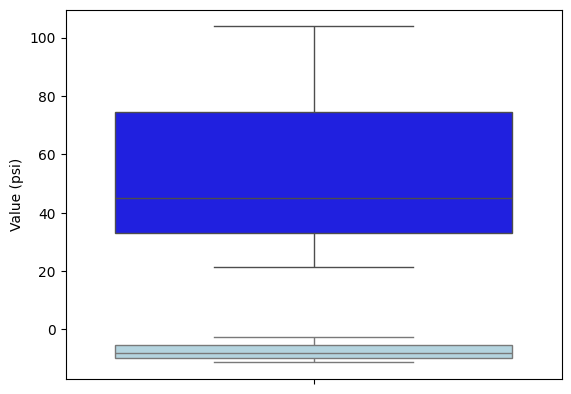

In [23]:
mask_grt_100 = df_40_50['Instant fuel economy (MPG)'] > 100
mpg_grt_100_40_50 = mask_grt_100.sum()
mask_lte_100 = df_40_50['Instant fuel economy (MPG)']  <= 100
mpg_lte_100_40_50 = mask_lte_100.sum()

mph_40_50_boost_mean =df_40_50['Boost (psi)'].mean().round(2) 
mph_40_50_boost_quantiles=df_40_50['Boost (psi)'].quantile([0.25,0.50,0.75])
df_40_50_boost_quantiles = pd.DataFrame(mph_40_50_boost_quantiles)
df_40_50_boost_quantiles = df_40_50_boost_quantiles.reset_index()
df_40_50_boost_quantiles.columns = ['Percentile', 'Value (psi)']

mpg_40_50_count=len(df_40_50)
mpg_40_50_mpg_mean=df_40_50['Instant fuel economy (MPG)'].mean().round(2)
mpg_40_50_100_quantiles=df_40_50['Instant fuel economy (MPG)'].quantile([0.25,0.50,0.75])
mpg_40_50_100_per=((mpg_grt_100_40_50/mpg_40_50_count)*100).round(2)
df_40_50_100_quantiles = pd.DataFrame(mpg_40_50_100_quantiles)
df_40_50_100_quantiles = df_40_50_100_quantiles.reset_index()
df_40_50_100_quantiles.columns = ['Percentile', '40-50mph (mpg)']

print("40-50mph")
print(f"Average Boost: {mph_40_50_boost_mean}")
print(f"Value Counts: {mpg_40_50_count}")
print(f"Values > 100mpg: {mpg_grt_100_40_50}")
print(f"Values <= 100mpg: {mpg_lte_100_40_50}")
print(f"Percent above 100mpg: {mpg_40_50_100_per}%")
print(f"Mean MPG: {mpg_40_50_mpg_mean}")
print("mpg Quartiles")
print(df_40_50_100_quantiles)
print("Boost Quartiles")
print(df_40_50_boost_quantiles)
sns.boxplot(y=df_40_50_boost_quantiles['Value (psi)'], color='lightblue')
sns.boxplot(y=df_40_50_100_quantiles['40-50mph (mpg)'], color='blue')

50-60mph
Average Boost: -4.81
Value Counts: 2812
Values > 100mpg: 536
Values <= 100mpg: 2276
Percent above 100mpg: 19.06%
Mean MPG: 54.68
mpg Quartiles
   Percentile  50-60mph (mpg)
0        0.25          19.800
1        0.50          38.850
2        0.75          85.225
Boost Quartiles
   Percentile  Value (psi)
0        0.25         -9.9
1        0.50         -5.3
2        0.75         -0.1


<Axes: ylabel='Value (psi)'>

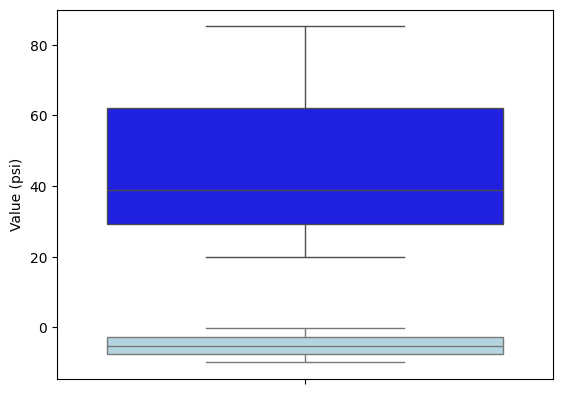

In [24]:
mask_grt_100 = df_50_60['Instant fuel economy (MPG)'] > 100
mpg_grt_100_50_60 = mask_grt_100.sum()
mask_lte_100 = df_50_60['Instant fuel economy (MPG)']  <= 100
mpg_lte_100_50_60 = mask_lte_100.sum()

mph_50_60_boost_mean =df_50_60['Boost (psi)'].mean().round(2) 
mph_50_60_boost_quantiles=df_50_60['Boost (psi)'].quantile([0.25,0.50,0.75])
df_50_60_boost_quantiles = pd.DataFrame(mph_50_60_boost_quantiles)
df_50_60_boost_quantiles = df_50_60_boost_quantiles.reset_index()
df_50_60_boost_quantiles.columns = ['Percentile', 'Value (psi)']

mpg_50_60_count=len(df_50_60)
mpg_50_60_mpg_mean=df_50_60['Instant fuel economy (MPG)'].mean().round(2)
mpg_50_60_100_quantiles=df_50_60['Instant fuel economy (MPG)'].quantile([0.25,0.50,0.75])
mpg_50_60_100_per=((mpg_grt_100_50_60/mpg_50_60_count)*100).round(2)
df_50_60_100_quantiles = pd.DataFrame(mpg_50_60_100_quantiles)
df_50_60_100_quantiles = df_50_60_100_quantiles.reset_index()
df_50_60_100_quantiles.columns = ['Percentile', '50-60mph (mpg)']

print("50-60mph")
print(f"Average Boost: {mph_50_60_boost_mean}")
print(f"Value Counts: {mpg_50_60_count}")
print(f"Values > 100mpg: {mpg_grt_100_50_60}")
print(f"Values <= 100mpg: {mpg_lte_100_50_60}")
print(f"Percent above 100mpg: {mpg_50_60_100_per}%")
print(f"Mean MPG: {mpg_50_60_mpg_mean}")
print("mpg Quartiles")
print(df_50_60_100_quantiles)
print("Boost Quartiles")
print(df_50_60_boost_quantiles)
sns.boxplot(y=df_50_60_boost_quantiles['Value (psi)'], color='lightblue')
sns.boxplot(y=df_50_60_100_quantiles['50-60mph (mpg)'], color='blue')

60-70mph
Average Boost: -3.12
Value Counts: 10283
Values > 100mpg: 1256
Values <= 100mpg: 9027
Percent above 100mpg: 12.21%
Mean MPG: 45.9
mpg Quartiles
   Percentile  60-70mph (mpg)
0        0.25            20.1
1        0.50            33.4
2        0.75            53.7
Boost Quartiles
   Percentile  Value (psi)
0        0.25         -7.1
1        0.50         -3.0
2        0.75          0.6


<Axes: ylabel='Value (psi)'>

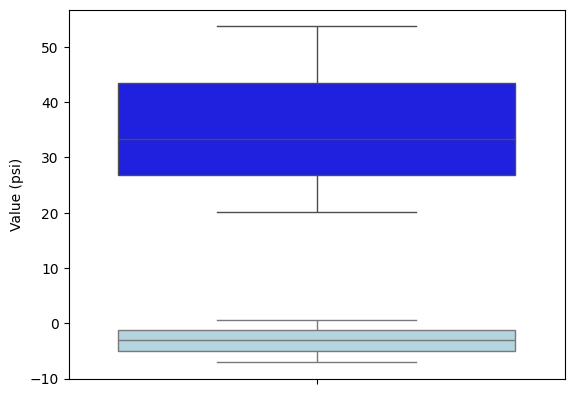

In [25]:
mask_grt_100 = df_60_70['Instant fuel economy (MPG)'] > 100
mpg_grt_100_60_70 = mask_grt_100.sum()
mask_lte_100 = df_60_70['Instant fuel economy (MPG)']  <= 100
mpg_lte_100_60_70 = mask_lte_100.sum()

mph_60_70_boost_mean =df_60_70['Boost (psi)'].mean().round(2) 
mph_60_70_boost_quantiles=df_60_70['Boost (psi)'].quantile([0.25,0.50,0.75])
df_60_70_boost_quantiles = pd.DataFrame(mph_60_70_boost_quantiles)
df_60_70_boost_quantiles = df_60_70_boost_quantiles.reset_index()
df_60_70_boost_quantiles.columns = ['Percentile', 'Value (psi)']

mpg_60_70_count=len(df_60_70)
mpg_60_70_mpg_mean=df_60_70['Instant fuel economy (MPG)'].mean().round(2)
mpg_60_70_100_quantiles=df_60_70['Instant fuel economy (MPG)'].quantile([0.25,0.50,0.75])
mpg_60_70_100_per=((mpg_grt_100_60_70/mpg_60_70_count)*100).round(2)
df_60_70_100_quantiles = pd.DataFrame(mpg_60_70_100_quantiles)
df_60_70_100_quantiles = df_60_70_100_quantiles.reset_index()
df_60_70_100_quantiles.columns = ['Percentile', '60-70mph (mpg)']

print("60-70mph")
print(f"Average Boost: {mph_60_70_boost_mean}")
print(f"Value Counts: {mpg_60_70_count}")
print(f"Values > 100mpg: {mpg_grt_100_60_70}")
print(f"Values <= 100mpg: {mpg_lte_100_60_70}")
print(f"Percent above 100mpg: {mpg_60_70_100_per}%")
print(f"Mean MPG: {mpg_60_70_mpg_mean}")
print("mpg Quartiles")
print(df_60_70_100_quantiles)
print("Boost Quartiles")
print(df_60_70_boost_quantiles)
sns.boxplot(y=df_60_70_boost_quantiles['Value (psi)'], color='lightblue')
sns.boxplot(y=df_60_70_100_quantiles['60-70mph (mpg)'], color='blue')

Greater Than 70mph
Average Boost: -1.78
Value Counts: 2512
Values > 100mpg: 269
Values <= 100mpg: 2243
Percent above 100mpg: 10.71%
Mean MPG: 40.63
mpg Quartiles
   Percentile  Greater than 70mph (mpg)
0        0.25                    17.800
1        0.50                    27.450
2        0.75                    46.725
Boost Quartiles
   Percentile  Value (psi)
0        0.25         -5.4
1        0.50         -1.5
2        0.75          1.9


<Axes: ylabel='Greater than 70mph (mpg)'>

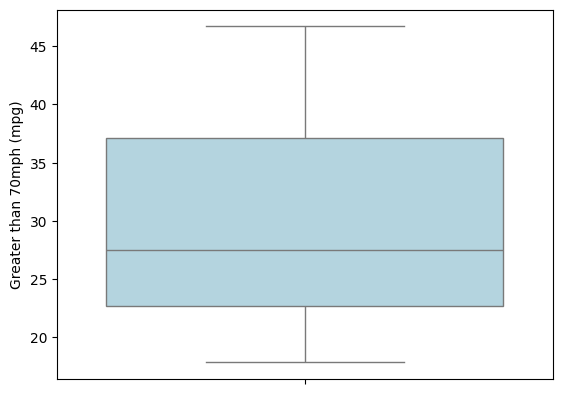

In [26]:
mask_grt_100 = df_grt_70['Instant fuel economy (MPG)'] > 100
mpg_grt_100_grt_70 = mask_grt_100.sum()
mask_lte_100 = df_grt_70['Instant fuel economy (MPG)']  <= 100
mpg_lte_100_grt_70 = mask_lte_100.sum()

mph_grt_70_boost_mean =df_grt_70['Boost (psi)'].mean().round(2) 
mph_grt_70_boost_quantiles=df_grt_70['Boost (psi)'].quantile([0.25,0.50,0.75])
df_grt_70_boost_quantiles = pd.DataFrame(mph_grt_70_boost_quantiles)
df_grt_70_boost_quantiles = df_grt_70_boost_quantiles.reset_index()
df_grt_70_boost_quantiles.columns = ['Percentile', 'Value (psi)']

mpg_grt_70_count=len(df_grt_70)
mpg_grt_70_mpg_mean=df_grt_70['Instant fuel economy (MPG)'].mean().round(2)
mpg_grt_70_100_quantiles=df_grt_70['Instant fuel economy (MPG)'].quantile([0.25,0.50,0.75])
mpg_grt_70_100_per=((mpg_grt_100_grt_70/mpg_grt_70_count)*100).round(2)
df_grt_70_100_quantiles = pd.DataFrame(mpg_grt_70_100_quantiles)
df_grt_70_100_quantiles = df_grt_70_100_quantiles.reset_index()
df_grt_70_100_quantiles.columns = ['Percentile', 'Greater than 70mph (mpg)']

print("Greater Than 70mph")
print(f"Average Boost: {mph_grt_70_boost_mean}")
print(f"Value Counts: {mpg_grt_70_count}")
print(f"Values > 100mpg: {mpg_grt_100_grt_70}")
print(f"Values <= 100mpg: {mpg_lte_100_grt_70}")
print(f"Percent above 100mpg: {mpg_grt_70_100_per}%")
print(f"Mean MPG: {mpg_grt_70_mpg_mean}")
print("mpg Quartiles")
print(df_grt_70_100_quantiles)
print("Boost Quartiles")
print(df_grt_70_boost_quantiles)
sns.boxplot(y=df_grt_70_100_quantiles['Greater than 70mph (mpg)'], color='lightblue')

In [27]:
mpg_count_list=[mpg_40_50_count, mpg_50_60_count, mpg_60_70_count, mpg_grt_70_count]
mpg_lte_100_count_list = [int(mpg_lte_100_40_50), int(mpg_lte_100_50_60), int(mpg_lte_100_60_70), int(mpg_lte_100_grt_70)]
mpg_grt_100_count_list = [int(mpg_grt_100_40_50), int(mpg_grt_100_50_60), int(mpg_grt_100_60_70), int(mpg_grt_100_grt_70)]
mpg_grt_100_per_list=[int(mpg_40_50_100_per),int(mpg_50_60_100_per),int(mpg_60_70_100_per),int(mpg_grt_70_100_per)]

mpg_100_df = pd.DataFrame({
    'total mpg counts': mpg_count_list,
    'total mpg <= 100 counts': mpg_lte_100_count_list,
    'total mpg > 100 counts': mpg_grt_100_count_list,
    '% > 100mpg':mpg_grt_100_per_list
}, index=['40-50mph', '50-60mph', '60-70mph', '>70mph'])

print(f'total mpg counts: {mpg_count_list}')
print(f'total mpg <= 100 counts: {mpg_lte_100_count_list}')
print(f'total mpg > 100 counts: {mpg_grt_100_count_list}')
print(f'% > 100mpg : {mpg_grt_100_per_list}')
mpg_100_df.head()

total mpg counts: [1810, 2812, 10283, 2512]
total mpg <= 100 counts: [1322, 2276, 9027, 2243]
total mpg > 100 counts: [488, 536, 1256, 269]
% > 100mpg : [26, 19, 12, 10]


,total mpg counts,total mpg <= 100 counts,total mpg > 100 counts,% > 100mpg
40-50mph,1810,1322,488,26
50-60mph,2812,2276,536,19
60-70mph,10283,9027,1256,12
>70mph,2512,2243,269,10


   Percentile  40-50mph (mpg)  50-60mph (mpg)  60-70mph (mpg)  \
0        0.25          21.200          19.800            20.1   
1        0.50          44.900          38.850            33.4   
2        0.75         103.825          85.225            53.7   

   Greater than 70mph (mpg)  
0                    17.800  
1                    27.450  
2                    46.725  


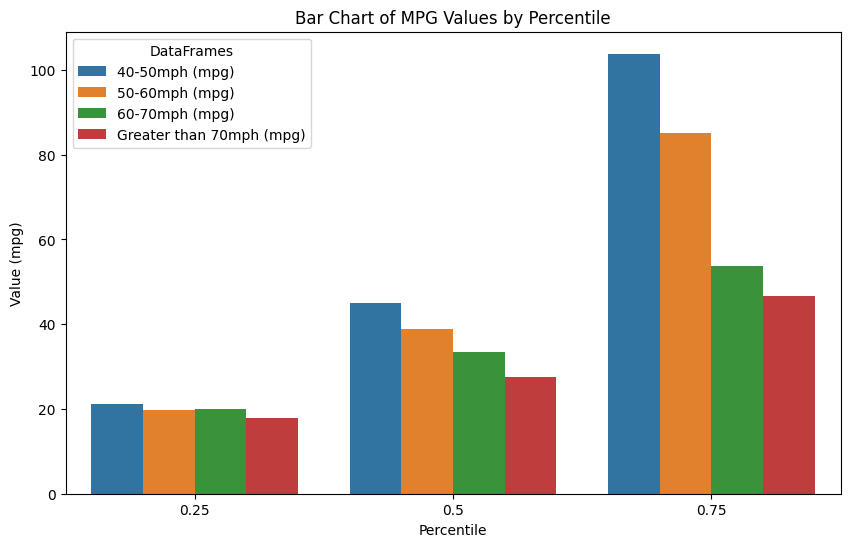

In [28]:
# Merge DataFrames on 'Percentile'
df_quartiles = pd.merge(df_40_50_100_quantiles, df_50_60_100_quantiles, on='Percentile')
df_quartiles = pd.merge(df_quartiles, df_60_70_100_quantiles, on='Percentile')
df_quartiles = pd.merge(df_quartiles, df_grt_70_100_quantiles, on='Percentile')
df_quartiles.head()
print(df_quartiles)

df_long = pd.melt(df_quartiles, id_vars='Percentile', var_name='DataFrame', value_name='Value (mpg)')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=df_long, x='Percentile', y='Value (mpg)', hue='DataFrame')
plt.title('Bar Chart of MPG Values by Percentile')
plt.xlabel('Percentile')
plt.ylabel('Value (mpg)')
plt.legend(title='DataFrames')
mpg_by_mph_file_path = os.path.join(output_folder_path, 'mpg_by_mph.jpeg')
plt.savefig(mpg_by_mph_file_path, format='jpeg', dpi=300)
plt.show()

In [29]:
df
#convert 
#df_less_10_geo=df_less_10.copy()
#df_less_10_geo.head()
#
#df_10_20_geo = df_10_20.copy()
#df_10_20_geo.head()
#
#df_20_30_geo = df_20_30.copy()
#df_20_30_geo.head()
#
#df_30_40_geo = df_30_40.copy()
#df_30_40_geo.head()
#
#df_40_50_geo = df_40_50.copy()
#df_40_50_geo.head()
#
#df_50_60_geo = df_50_60.copy()
#
#
#df_60_70_geo = df_60_70.copy()

df_55_75_geo = df_55_75.copy()





In [30]:
#map_center = [df_60_70['latitude'].mean(), df_60_70['longitude'].mean()]
#print(map_center)

In [31]:
print("Available colormaps:")
for name in dir(cm):
    if 'colormap' in name.lower():
        print(name)

Available colormaps:
ColorMap
LinearColormap
StepColormap
_LinearColormaps
_StepColormaps


In [32]:
df_map=df_moving.copy()
map_center = [44.980164, -93.185692]
m = folium.Map(location=map_center, zoom_start=11)
coordinates = df_map[['latitude', 'longitude', 'Vehicle speed (MPH)']].values.tolist()
sorted_coordinates = sorted(coordinates, key=lambda x: x[2])
colormap = cm.LinearColormap(
    colors=['blue', 'green', 'yellow', 'red'],  # Custom color range
    vmin=df_map['Vehicle speed (MPH)'].min(),
    vmax=df_map['Vehicle speed (MPH)'].max(),
    caption='Vehicle Speed (MPH)'   
)

colormap.add_to(m)



for i in range(len(df_map) - 1):
    # Coordinates of the current segment
    start = [df_map.iloc[i]['latitude'], df_map.iloc[i]['longitude']]
    end = [df_map.iloc[i + 1]['latitude'], df_map.iloc[i + 1]['longitude']]
    
    # Value for color mapping (use average or a specific value)
    segment_value = (df_map.iloc[i]['Vehicle speed (MPH)'] + df_map.iloc[i + 1]['Vehicle speed (MPH)']) / 2
    
    # Create and add a PolyLine for each segment
    folium.PolyLine(
        locations=[start, end],
        color=colormap(segment_value),  # Map value to color
        weight=5,
        opacity=1
        ).add_to(m)

# Save the map to an HTML file
map_moving_file_path = os.path.join(output_folder_path, 'map_moving.html')
m.save(map_moving_file_path)


In [33]:
#map_center = [44.980164, -93.185692]
#m = folium.Map(location=map_center, zoom_start=11)
#
#
## Prepare the list of coordinates for the PolyLine
#coordinates = df_55_75_geo[['latitude', 'longitude']].values.tolist()
#
## Add a PolyLine to the map
#folium.PolyLine(
#    locations=coordinates,
#    popup=[str(row['Time (sec)']) for idx, row in df_55_75_geo.iterrows()],
#    weight=5,
#    opacity=1,
#    color='blue'
#).add_to(m)

# Save the map to an HTML file
m.save('mpg_55_75_map.html')

In [34]:
hvexplorer = df.hvplot.explorer()
hvexplorer

BokehModel(combine_events=True, render_bundle={'docs_json': {'a89aa80f-5bad-4e4a-aa59-2c7bd3ca7fc9': {'version…

In [35]:
df['Engine RPM (RPM)']=df['Engine RPM (RPM)']/100
df['Engine Power (hp)']=df['Engine Power (hp)']/10
df['Ambient air temperature (°F)']=df['Ambient air temperature (°F)']/10
#df['Intake air temperature bank 1  sensor 1 (°F)']=df['Intake air temperature bank 1  sensor 1 (°F)']/10
#df['Relative throttle position (%)']=df['Relative throttle position (%)']/10
#df[' Boost (psi)']=df[' Boost (psi)']/10
#df[' Mass air flow rate (lb/min)']=df[' Mass air flow rate (lb/min)']/10


#df['Boost (psi)']= df['Boost (psi)']/10


In [36]:
start_index = int(round(2227.003))  # or use int(2227.003)
end_index = int(round(2231.996))    # or use int(2255.994)

# Select rows between start_index and end_index (inclusive)
boosted = df.iloc[start_index:end_index + 1]

print(boosted.head())

      Time (sec)  Vehicle speed (MPH)  Acceleration (ft/s²)  \
2227     222.705            23.612104          1.092739e-14   
2228     222.806            23.612104          1.092739e-14   
2229     222.906            22.990734         -2.540568e+00   
2230     223.006            22.990734         -2.540568e+00   
2231     223.106            22.990734         -2.540568e+00   

      Acceleration (Avg) (ft/s²)  Relative accelerator pedal position (%)  \
2227                    3.168181                                      0.0   
2228                    3.168181                                      0.0   
2229                    1.438226                                      0.0   
2230                    1.438226                                      0.0   
2231                    0.819216                                      0.0   

      Engine RPM (RPM)  Boost (psi)  Engine Power (hp)  \
2227           26.7225   -10.732793           1.158243   
2228           26.7225   -10.732793       

In [37]:
#boosted=df.iloc[2227:2233]
#boosted.head

In [38]:
boosted.hvplot(
    kind='line',
    x='Time (sec)',
    y=['Engine RPM (RPM)','Boost (psi)','Relative throttle position (%)','Vehicle speed (MPH)' ], #'Engine Power (hp)'
    legend='bottom_right',
    widget_location='bottom',
)

DataError: Supplied data does not contain specified dimensions, the following dimensions were not found: ['Relative throttle position (%)']

PandasInterface expects tabular data, for more information on supported datatypes see https://holoviews.org/user_guide/Tabular_Datasets.html

In [ ]:
df.hvplot(
    kind='line',
    x='Time (sec)',
    y=['Mass Air/Boost'],
    legend='bottom_right',
    widget_location='bottom',
)

In [ ]:
df.hvplot(
    kind='line',
    x='Time (sec)',
    y=['Mass Air/manPress'],
    legend='bottom_right',
    widget_location='bottom',
)

In [ ]:
df.hvplot(
    kind='line',
    x='Time (sec)',
    y1='Intake air temperature bank 1  sensor 1 (°F)',
    y2='Boost (psi)',
    legend='bottom_right',
    widget_location='bottom',
)

In [ ]:
moving_df.describe()